<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 

In [3]:
# 1. Normalizamos los datos continuos con MinMaxScaler
numeric_data = df.select_dtypes(include='number')
numeric_data = numeric_data.fillna(numeric_data.mean())
scaler = MinMaxScaler()
normalized_numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

In [4]:
# 2. Codificar variables categoricas
categorical_data = df.select_dtypes(include='object')
encoded_categorical_data = pd.get_dummies(categorical_data)

In [5]:
# 3. Combinar ambos datasets
df_procesado = pd.concat(
    [
        normalized_numeric_data, 
        encoded_categorical_data
    ], axis=1)

In [6]:
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [7]:
# Ajuste del modelo K-means
k = 8 # Numero de clusters
n_init = 10 # NUmero de inicializadores
kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
kmeans.fit(df_procesado)

KMeans(random_state=42)

In [8]:
# Asociar a cada individuo el correspondiente cluster
clusters = kmeans.predict(df_procesado)

# Calcular el valor de los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Crear un DataFrame para resumir las cualidades de cada cluster
cluster_summary = pd.DataFrame()

#Valor promedio de las variables numericas en cada cluster
cluster_summary['Promedio'] = df_procesado.groupby(clusters).mean().mean(axis=1)

#Moda para las variables numericas en cada cluster
for column in df_procesado.columns:
    if df_procesado[column].dtype != 'object':
        cluster_summary[f'Moda de {column}'] = df_procesado.groupby(clusters)[column].apply(lambda x: x.mode().iloc[0])

In [9]:
# Resumen de cada cluster
print("Resumen de las principales cualidades de cada cluster:")
cluster_summary

Resumen de las principales cualidades de cada cluster:


,Promedio,Moda de year,Moda de desplazamiento,Moda de cilindros,Moda de co2,Moda de consumo_litros_milla,Moda de clase_tipo_Camionetas,Moda de clase_tipo_Coche Familiar,Moda de clase_tipo_Coches Grandes,Moda de clase_tipo_Coches Medianos,...,Moda de consumo_tipo_alto,Moda de consumo_tipo_bajo,Moda de consumo_tipo_moderado,Moda de consumo_tipo_muy alto,Moda de consumo_tipo_muy bajo,Moda de co2_tipo_alto,Moda de co2_tipo_bajo,Moda de co2_tipo_moderado,Moda de co2_tipo_muy alto,Moda de co2_tipo_muy bajo
0,0.250228,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.239902,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.226047,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.260145,0.558824,0.653846,0.428571,0.454199,0.393464,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.233967,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0.236152,0.823529,0.179487,0.142857,0.317749,0.241830,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0.260150,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0.246832,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [10]:
# Secuencia de numeros de clusters a comparar
num_clusters = [5, 10, 20, 30, 50, 75, 100, 200, 300]

# Lista para almacenar las inercias
inertias = []

# Ajuste del modelo K-means y calculo de la inercia para cada numero de clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_procesado)
    inertias.append(kmeans.inertia_)

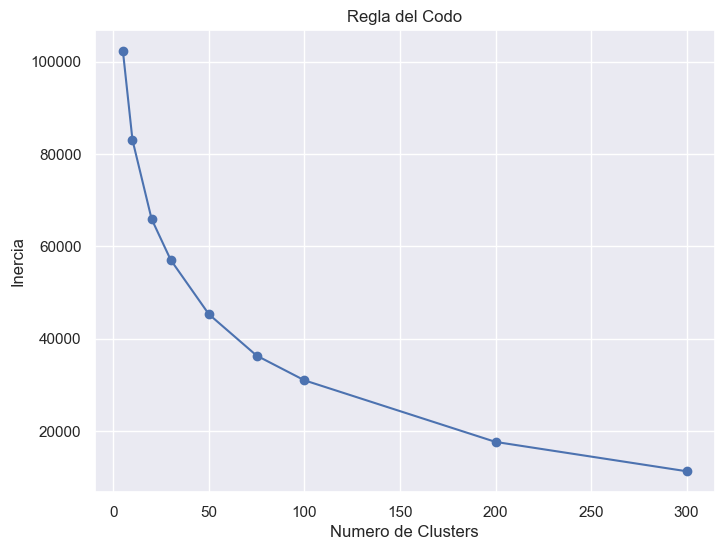

In [11]:
# Grafico de la regla del codo
fig, axs = plt.subplots(figsize=(8,6)) 
plt.plot(num_clusters, inertias, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Inercia')
plt.title('Regla del Codo')
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Podemos notar que puede ser conveniente usar algún valor cercano a 100, pues ahí comienza a estabilizarse.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 



In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [13]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [14]:
# PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(iris[features])

# Crear DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_results, columns=['PC1','PC2'])
pca_df['species'] = iris[target]

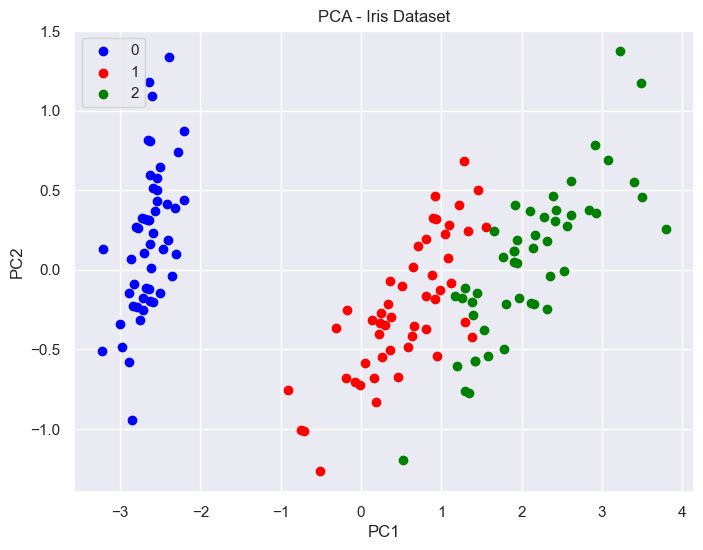

In [15]:
# Grafico de los resultados de PCA
plt.figure(figsize=(8,6))
targets = [0, 1, 2]
colors = ['blue', 'red', 'green']
for target, color in zip(targets, colors):
    indices = pca_df['species'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, label=target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.show()

In [16]:
# TSNE
target = 'species'
tsne =  TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(iris[features])

# Crear DataFrame con los resultados de TSNE
tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1','Dim2'])
tsne_df['species'] = iris[target].copy()

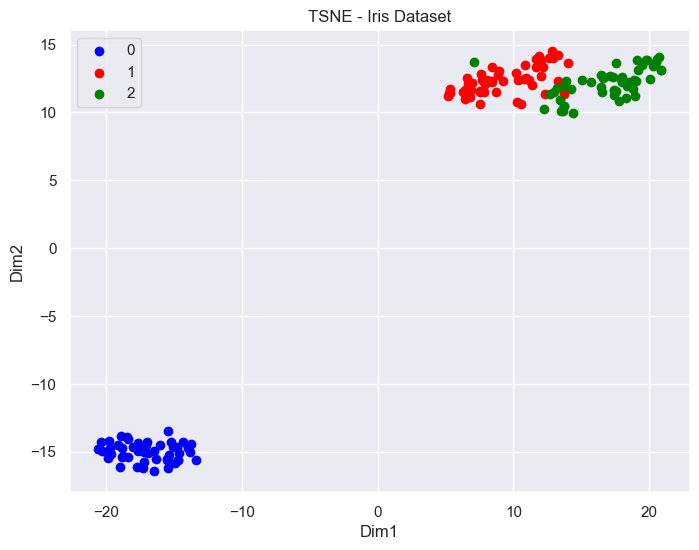

In [17]:
# Grafico de los resultados de TSNE
plt.figure(figsize=(8,6))
for target, color in zip(targets, colors):
    indices = tsne_df['species'] == target
    plt.scatter(tsne_df.loc[indices, 'Dim1'], tsne_df.loc[indices, 'Dim2'], c=color, label=target)
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('TSNE - Iris Dataset')
plt.legend()
plt.show()

Podemos observar que los dos algoritmos crean una buena separación de categorías, pero TSNE separa mejor los datos, y se puede observar en contraste con PCA.